In [1]:
!pip install soynlp

In [2]:
!pip show soynlp

Name: soynlp
Version: 0.0.492
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: c:\users\python\anaconda3\lib\site-packages
Requires: scipy, psutil, numpy, scikit-learn
Required-by: 


In [3]:
import pandas as pd
import numpy as np
import re

In [4]:
df = pd.read_csv('foo1.csv', engine='python', encoding='utf-8')

In [5]:
df

,Unnamed: 0,본문,제목
0,0,그런데 박지원 의원은 문제의 동영상을 지난 2013년 3월 초에 경찰에게 받아서 박...,"""김학의 동영상, 3월 초 경찰이 제공""…시점·이유 규명해야"
1,1,SUB_TITLE_STARTSUB_TITLE_END문재인 대통령의 ‘입’인 김의겸 ...,위기 내몰린 청와대 ‘메신저’…‘엇나간 해명’까지 사퇴 여론
2,2,별장 성폭력 의혹의 당사자인 김학의 전 법무부 차관과 친분이 있는 것으로 알려진 정...,[여의도 사사건건] 정두언 “김학의는 같은 반 친구…나도 별장 초대받아”
3,3,[앵커]그런데 이 문제와 관련해서 박영선 중소기업부 장관 후보자가 어제 청문회에서 ...,"말 바꾼 박영선 ""CD는 안보여줬다"", 野 ""청문회 거짓진술"""
4,4,"[앵커]뉴스 줌인 시간입니다. 정윤섭 기자 나와 있습니다.정 기자, 어떤 소식인...",[뉴스줌인] “보관 장소는 하느님만 안다”…박지원의 수첩
5,5,[앵커]비하인드뉴스 시작을 하겠습니다. 수첩을 못 전해 드렸네요. 박성태 기자가 나...,[비하인드 뉴스] 박지원이 해석한 '6년 전 황교안'
6,6,"""2013년 3월 13일 黃 만나"" 일정표 공개…6년 전 법사위서 ""黃, 김학의 사...","박영선 ""6년 전 황교안, 김학의 얘기에 당황…귀까지 빨개져""(종합2보)"
7,7,【서울=뉴시스】임종명 기자 = 박영선 중소벤처기업부 장관 후보자가 2013년 당시 ...,박영선-황교안 만난 날 김주현 법무부 기조실장 동석 가능성
8,8,[뉴스데스크]◀ 앵커 ▶서울 동작구 흑석동의 재개발 예정집니다.청와대 김의겸 대변인...,26억 재개발 '올인'…김의겸 대변인이 샀다는 건물 가 봤더니…
9,9,"[곽재훈 기자]문재인 정부 2기 장관 후보자 인사청문회와 관련, 자유한국당은 7개 ...",文정부 다주택자 비판한 한국당 의원들 재산 살펴보니…


In [6]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()
tokenizer

C:\Users\python\Anaconda3\lib\site-packages\soynlp\tokenizer\_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


In [7]:
sample_content = df['본문'][7]

In [8]:
tokened_content = tokenizer.tokenize(sample_content)

In [9]:
tokened_content[:10]

['【', '서울', '=', '뉴시스', '】', '임종명', '기자', '=', '박영선', '중소벤처기업부']

In [10]:
print(len(tokened_content))

373


In [11]:
def preprocessing(text):
    text = re.sub('\\\\n', ' ', text)
    return text

In [12]:
%time sentences = df['본문'].apply(preprocessing)

Wall time: 997 µs


In [13]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

Wall time: 115 ms


0    [그런데, 박지원, 의원은, 문제의, 동영상을, 지난, 2013, 년, 3, 월, ...
1    [SUB, _, TITLE, _, STARTSUB, _, TITLE, _, END,...
2    [별장, 성폭력, 의혹의, 당사자인, 김학의, 전, 법무부, 차관과, 친분이, 있는...
Name: 본문, dtype: object

In [14]:
tokens[9][:10]

['[', '곽재훈', '기자', ']', '문재인', '정부', '2', '기', '장관', '후보자']

In [15]:
stopwords_kr = ['하지만', '그리고', '그런데', '저는', '제가', 
               '그럼', '이런', '저런', '합니다',
               '많은', '많이', '정말', '너무', '[',']', '것으로', '했습니다', '했다']

In [16]:
!pip install wordcloud

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(
    font_path = 'C:/Windows/Fonts/NanumBarunGothic.ttf',
    stopwords = stopwords_kr,
    background_color = backgroundcolor,
    width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

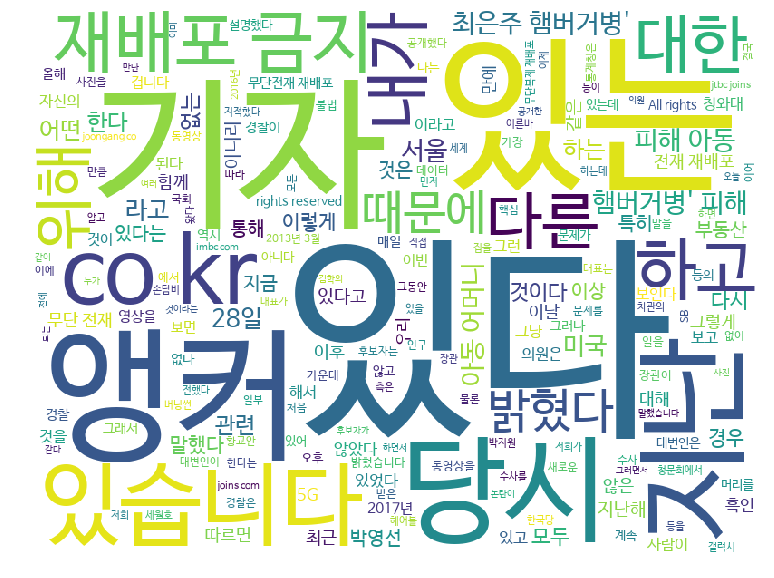

Wall time: 1.07 s


In [20]:
%time displayWordCloud(' '.join(sentences))

In [21]:
from soynlp.noun import LRNounExtractor

In [22]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns=noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (2047, 1132) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 442 nouns are extracted
Wall time: 196 ms


In [23]:
%time displayWordCloud(' '.join(nouns))

NameError: name 'nouns' is not defined